<a href="https://colab.research.google.com/github/nileshmalode11/petents_classification_and_sentance-similarity-project/blob/main/Dask_implimentation_21dec.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# #Install sentence_transformers pandas torch
!pip install sentence_transformers
!pip install pyvis
!pip install transformers_interpret
# !pip install pyspark==3.5.0
!pip install torch
!pip install dask
!pip install polars

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 10.6 MB/s eta 0:00:00
  Created wheel for sentence_transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125923 sha256=151e959d8e04eded0d1ea809abcdd4dd019dfef8e0dd5299931b14e0616b05e5
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence_transformers
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 23.4 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Import Required Libraries
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
import os
import matplotlib.pyplot as plt
import networkx as nx
from jinja2 import Template
from pyvis.network import Network
from IPython.display import HTML

import torch
import dask.dataframe as dd
import dask.array as da

# from pyspark.sql.functions import count
# from pyspark.sql.functions import udf
# from pyspark.sql.types import ArrayType, FloatType
# from pyspark.sql.functions import col

from scipy.spatial.distance import cosine

In [ ]:
# Read JSON into Dask DataFrame
dask_df = dd.read_json("/content/drive/MyDrive/train/train/a/data000000000000.gz", lines=True)

In [ ]:
# Assuming df is your Dask DataFrame
concatenated_df = dask_df.assign(text=dask_df['abstract'].astype(str) + dask_df['description'])

In [ ]:
concatenated_df.head()

,publication_number,abstract,application_number,description,text
0,US-2006134160-A1,this invention relates to novel calcium phosph...,US-52740605-A,throughout the following description specific ...,this invention relates to novel calcium phosph...
1,US-4592498-A,"a stapler , particularly for suturing skin wou...",US-71138185-A,preferred embodiments of the invention are ill...,"a stapler , particularly for suturing skin wou..."
2,US-2014379009-A1,a nerve guidance conduit includes a spiral str...,US-201414313384-A,embodiments of the present invention provide n...,a nerve guidance conduit includes a spiral str...
3,US-4157173-A,a rail connector and improvement in seat base ...,US-86596677-A,"referring now to the drawings , and particular...",a rail connector and improvement in seat base ...
4,US-2017360443-A1,an anvil assembly is disclosed that includes a...,US-201715606289-A,exemplary embodiments of the presently disclos...,an anvil assembly is disclosed that includes a...


In [ ]:
%%time
#load the model
model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

.gitattributes:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.88k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/671 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/440 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

modules.json:   0%|          | 0.00/229 [00:00<?, ?B/s]

CPU times: user 1.67 s, sys: 1.06 s, total: 2.73 s
Wall time: 10.1 s


In [ ]:
# concatenated_df1=concatenated_df["text"].compute().tolist()
# sentence_embeddings=model.encode(concatenated_df1)
# sentence_embeddings
# np.save("/content/drive/MyDrive/embeddings.npy",sentence_embeddings)

In [ ]:
sentence_embeddings=np.load("/content/drive/MyDrive/embeddings.npy")

In [ ]:
# #Load the sentence embeddigs
# sentence_embeddings=np.load("/content/drive/MyDrive/petants/sentence_embeddings49.npy")

In [ ]:
sample_text = concatenated_df['text'].sample(frac=1).compute().head(1).iloc[0]

In [ ]:
sample_text

'a multipurpose roaster is mainly composed of a frame , fixtures and a skewer , wherein two side board have a slanting sliding guide from up gradually decent with a recess and a seat at the bottom end of the sliding guide , the fixture has a hole and a bolt for a skewer to insert there through and secured by bolt thereat , or to accommodate a grid cage or a pan thereto , and slide along the sliding guide into the roaster .the present invention relates to a multipurpose roaster which is composed of a frame 1 , fixtures 2 and 2a and a skewer 3 . each of the two side boards 11 of the frame 1 has a corresponding sliding guide 111 , as shown in fig2 . a recess 112 at the end of the sliding guide 111 and a seat 113 at the bottom end . the seat 113 is formed by a short lug 113a , a long lug 113b , and a trough 113c . the short lug 113a is connected with its peak to the sliding guide 111 , and the trough 113c is so designed that corresponding to the recess 112 . the fixture 2 or 2a ( since it 

In [ ]:
%%time
query_embedding = model.encode([sample_text])

CPU times: user 1.79 s, sys: 21.5 ms, total: 1.81 s
Wall time: 2.02 s


In [ ]:
%%time
cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]


CPU times: user 1.64 ms, sys: 0 ns, total: 1.64 ms
Wall time: 1.9 ms


In [ ]:
cosine_scores

tensor([0.2942, 0.4680, 0.3038,  ..., 0.4231, 0.2627, 0.3920])

In [ ]:
import dask.dataframe as dd
import dask.array as da

# Assuming concatenated_df is your concatenated Dask DataFrame
# Assuming cosine_scores is your NumPy array of similarity scores

# Convert the 'texts' column to Dask array
publication_number = concatenated_df['publication_number'].to_dask_array()
abstract = concatenated_df['abstract'].to_dask_array()
application_number = concatenated_df['application_number'].to_dask_array()
description = concatenated_df['description'].to_dask_array()

# Convert PyTorch tensor to NumPy array
cosine_scores_numpy = cosine_scores.detach().numpy()

# Convert NumPy array to Dask array
similarity_score = da.from_array(cosine_scores_numpy)

# Add the 'similarity_score' column to the existing Dask DataFrame
concatenated_df = concatenated_df.assign(similarity_score=similarity_score)

# Sort the Dask DataFrame by similarity scores in descending order
result_ddf = concatenated_df.sort_values(by='similarity_score', ascending=False)

# Now result_ddf is a Dask DataFrame with the added 'similarity_score'

In [ ]:
result_ddf.head()

,publication_number,abstract,application_number,description,text,similarity_score
1001,US-6076453-A,a multipurpose roaster is mainly composed of a...,US-36849299-A,the present invention relates to a multipurpos...,a multipurpose roaster is mainly composed of a...,1.000000
12,US-2011309601-A1,"a mission adaptable multi - purpose , collapsi...",US-92522710-A,"as shown in the drawing fig1 - 70 , the presen...","a mission adaptable multi - purpose , collapsi...",0.616364
838,US-4989580-A,an apparatus for simultaneously grilling food ...,US-49014890-A,"without limiting the scope of the invention , ...",an apparatus for simultaneously grilling food ...,0.592636
973,US-4019643-A,a wheeled carrier for hay or the like has a lo...,US-59806175-A,"referring to the drawings , the apparatus of t...",a wheeled carrier for hay or the like has a lo...,0.581527
215,US-4287993-A,an adjustable rack is provided which comprises...,US-15700380-A,while the present invention is by no means lim...,an adjustable rack is provided which comprises...,0.570984


In [ ]:
type(result_ddf)

dask.dataframe.core.DataFrame

In [ ]:
#took top 10 heighest mathes from result_ddf
final_df = result_ddf.nlargest(10, 'similarity_score').compute()
final_df

,publication_number,abstract,application_number,description,text,similarity_score
1001,US-6076453-A,a multipurpose roaster is mainly composed of a...,US-36849299-A,the present invention relates to a multipurpos...,a multipurpose roaster is mainly composed of a...,1.000000
12,US-2011309601-A1,"a mission adaptable multi - purpose , collapsi...",US-92522710-A,"as shown in the drawing fig1 - 70 , the presen...","a mission adaptable multi - purpose , collapsi...",0.616364
838,US-4989580-A,an apparatus for simultaneously grilling food ...,US-49014890-A,"without limiting the scope of the invention , ...",an apparatus for simultaneously grilling food ...,0.592636
973,US-4019643-A,a wheeled carrier for hay or the like has a lo...,US-59806175-A,"referring to the drawings , the apparatus of t...",a wheeled carrier for hay or the like has a lo...,0.581527
215,US-4287993-A,an adjustable rack is provided which comprises...,US-15700380-A,while the present invention is by no means lim...,an adjustable rack is provided which comprises...,0.570984
601,US-5921172-A,apparatus can cook foodstuffs with a pot and a...,US-3943398-A,"referring to fig1 and 2 , the present apparatu...",apparatus can cook foodstuffs with a pot and a...,0.569627
673,US-8342341-B2,"a utensil storage stand , which comprises a ba...",US-77999710-A,in the following are detailed descriptions of ...,"a utensil storage stand , which comprises a ba...",0.568707
99,US-4466616-A,a missile responsive amusement apparatus compr...,US-44566682-A,the present invention was actually reduced to ...,a missile responsive amusement apparatus compr...,0.567829
1002,US-4744293-A,an automatic continuous food frying device com...,US-94780486-A,further scope of applicability of the present ...,an automatic continuous food frying device com...,0.565016
129,US-7987775-B2,the present invention relates to a portable ho...,US-40823506-A,"with reference to fig1 , a first embodiment of...",the present invention relates to a portable ho...,0.564643


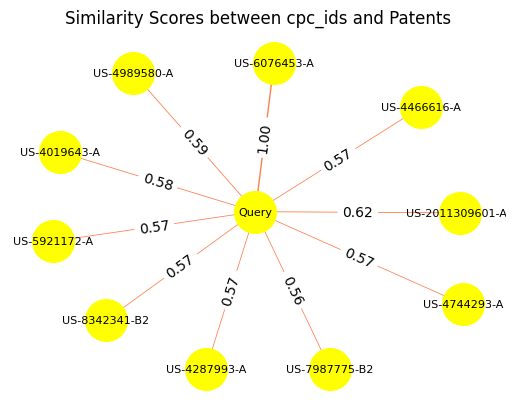

,publication_number,abstract,application_number,description,text,similarity_score
1001,US-6076453-A,a multipurpose roaster is mainly composed of a...,US-36849299-A,the present invention relates to a multipurpos...,a multipurpose roaster is mainly composed of a...,1.000000
12,US-2011309601-A1,"a mission adaptable multi - purpose , collapsi...",US-92522710-A,"as shown in the drawing fig1 - 70 , the presen...","a mission adaptable multi - purpose , collapsi...",0.616364
838,US-4989580-A,an apparatus for simultaneously grilling food ...,US-49014890-A,"without limiting the scope of the invention , ...",an apparatus for simultaneously grilling food ...,0.592636
973,US-4019643-A,a wheeled carrier for hay or the like has a lo...,US-59806175-A,"referring to the drawings , the apparatus of t...",a wheeled carrier for hay or the like has a lo...,0.581527
215,US-4287993-A,an adjustable rack is provided which comprises...,US-15700380-A,while the present invention is by no means lim...,an adjustable rack is provided which comprises...,0.570984
601,US-5921172-A,apparatus can cook foodstuffs with a pot and a...,US-3943398-A,"referring to fig1 and 2 , the present apparatu...",apparatus can cook foodstuffs with a pot and a...,0.569627
673,US-8342341-B2,"a utensil storage stand , which comprises a ba...",US-77999710-A,in the following are detailed descriptions of ...,"a utensil storage stand , which comprises a ba...",0.568707
99,US-4466616-A,a missile responsive amusement apparatus compr...,US-44566682-A,the present invention was actually reduced to ...,a missile responsive amusement apparatus compr...,0.567829
1002,US-4744293-A,an automatic continuous food frying device com...,US-94780486-A,further scope of applicability of the present ...,an automatic continuous food frying device com...,0.565016
129,US-7987775-B2,the present invention relates to a portable ho...,US-40823506-A,"with reference to fig1 , a first embodiment of...",the present invention relates to a portable ho...,0.564643


In [ ]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(final_df)):
    pub_num = final_df.iloc[i]['publication_number']
    app_num = final_df.iloc[i]['application_number']
    similarity_score = final_df.iloc[i]['similarity_score']
    sentence = final_df.iloc[i]['text']

    G.add_node(pub_num, label=f"pub_num {pub_num}\napp_num {app_num}\nSimilarity {similarity_score:.4f}")

    # # Connect nodes with directed edges based on similarity score
    G.add_edge("Query",pub_num, weight=similarity_score)

# Draw the graph using a force-directed layout
pos = nx.spring_layout(G)

# Extract edge weights for visualization
edge_weights = [G[u][v]['weight'] for u, v in G.edges()]

# Draw nodes, edges, and labels
nx.draw_networkx_nodes(G, pos, node_size=900, node_color="yellow")
nx.draw_networkx_edges(G, pos, width=edge_weights, edge_color="coral", alpha=1)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="black")

# Display edge weights on the graph
edge_labels = {(u, v): f"{G[u][v]['weight']:.2f}" for u, v in G.edges()}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)



# Show the graph
plt.title("Similarity Scores between cpc_ids and Patents")
plt.axis("off")
plt.show()
final_df

In [ ]:
import networkx as nx
from pyvis.network import Network
from IPython.display import HTML

# Extracting necessary columns for visualization
data = final_df[['publication_number', 'application_number', 'similarity_score']]

# Create a directed graph
G = nx.DiGraph()

# Add nodes and edges based on similarity scores
for i in range(len(data)):
    pub_num = str(data.iloc[i]['publication_number'])  # Convert to string if not already
    app_num = str(data.iloc[i]['application_number'])  # Convert to string if not already
    similarity_score = float(data.iloc[i]['similarity_score'])  # Convert to float

    G.add_node(app_num, label=f"Pub_num {pub_num}\nSimilarity {similarity_score:.4f}")
    G.add_edge("Query", app_num, value=similarity_score)

# Create a Pyvis network
pyvis_network = Network(notebook=True, cdn_resources='remote')
pyvis_network.from_nx(G)

# Save the Pyvis network as an HTML file
html_file_path = '/content/drive/MyDrive/model.html'
pyvis_network.save_graph(html_file_path)

# Display the web diagram in Colab
with open(html_file_path, 'r') as file:
    html_content = file.read()

HTML(html_content)


## **streamlit**


In [ ]:
! pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 27.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.6/190.6 kB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 64.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 8.0 MB/s eta 0:00:00
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 7.0.0
    Uninstalling importlib-metadata-7.0.0:
      Successfully uninstalled importlib-metadata-7.0.0


In [ ]:
pip install streamlit pandas sentence_transformers dask


In [ ]:
%%writefile app.py
import streamlit as st
import pandas as pd
from sentence_transformers import SentenceTransformer, util


st.title('similarity_score Detection System')

st.markdown (
    """



    """,
    unsafe_allow_html=True
)

query= st.text_area('Enter a sentence for similarity comparison:')
model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

submitted = st.button('Submit')
if submitted:

  df = pd.DataFrame({'query': [query]})

query_embedding=model.encode(df)

  # Assuming concatenated_df is your concatenated Dask DataFrame
# Assuming cosine_scores is your NumPy array of similarity scores



# Convert the 'texts' column to Dask array
text=concatenated_df["text"].to_dask_array()
publication_number = concatenated_df['publication_number'].to_dask_array()
abstract = concatenated_df['abstract'].to_dask_array()
application_number = concatenated_df['application_number'].to_dask_array()
description = concatenated_df['description'].to_dask_array()

cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

# Convert PyTorch tensor to NumPy array
cosine_scores_numpy = cosine_scores.detach().numpy()

# Convert NumPy array to Dask array
similarity_score = da.from_array(cosine_scores_numpy)

# Add the 'similarity_score' column to the existing Dask DataFrame
concatenated_df = concatenated_df.assign(similarity_score=similarity_score)

# Sort the Dask DataFrame by similarity scores in descending order
result_ddf = concatenated_df.sort_values(by='similarity_score', ascending=False)

# Now result_ddf is a Dask DataFrame with the added 'similarity_score'
st.write(result_ddf)

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.219.247:8501

npx: installed 22 in 1.784s
your url is: https://proud-months-live.loca.lt
  Stopping...
^C


In [ ]:
%%writefile app1.py
import streamlit as st
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import dask.array as da
import polars as pl
import pandas as pd
import numpy as np
import seaborn as sns
from sentence_transformers import SentenceTransformer, util
import os
import matplotlib.pyplot as plt
import networkx as nx
from jinja2 import Template
from pyvis.network import Network
from IPython.display import HTML

import torch
import dask.dataframe as dd
import dask.array as da

st.title('Similarity Score Detection System')

st.markdown (
    """
    Enter a sentence for similarity comparison:
    """
)

query = st.text_area('Enter a sentence for similarity comparison:')
model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

submitted = st.button('Submit')

if submitted:
    # Assuming concatenated_df is your Pandas DataFrame
    # Assuming sentence_embeddings is your NumPy array of sentence embeddings

    # Encode the query
    query_embedding = model.encode([query])[0]

    # Assuming concatenated_df is your Pandas DataFrame
    # Assuming sentence_embeddings is your NumPy array of sentence embeddings

    dask_df = dd.read_json("/content/drive/MyDrive/train/train/a/data000000000000.gz", lines=True)
    concatenated_df = dask_df.assign(text=dask_df['abstract'].astype(str) + dask_df['description'])

    # Convert the 'texts' column to NumPy array
    texts = concatenated_df["text"].values

    # Encode the texts
    sentence_embeddings = model.encode(texts)

    # Calculate cosine similarity scores
    cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

    # Convert PyTorch tensor to NumPy array
    cosine_scores_numpy = cosine_scores.detach().numpy()

    # Convert NumPy array to Dask array
    similarity_score = da.from_array(cosine_scores_numpy)

    # Add the 'similarity_score' column to the existing Pandas DataFrame
    concatenated_df['similarity_score'] = similarity_score

    # Sort the Pandas DataFrame by similarity scores in descending order
    result_df = concatenated_df.sort_values(by='similarity_score', ascending=False)

    # Now result_df is a Pandas DataFrame with the added 'similarity_score'
    st.write(result_df)


Writing app1.py


In [ ]:
!streamlit run app1.py & npx localtunnel --port 8501

[..................] / rollbackFailedOptional: verb npm-session 6bd6cd7c8fd10ce


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.82.219.247:8501

npx: installed 22 in 2.044s
your url is: https://rude-crabs-begin.loca.lt
2023-12-22 15:50:02.711 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/content/app1.py", line 51, in <module>
    sentence_embeddings = model.encode(texts)
  File "/usr/local/lib/python3.10/dist-packages/sentence_transformers/SentenceTransformer.py", line 156, in encode
    length_sorted_idx = np.argsort([-self._text_length(sen) for sen in sentences])
  File "/usr/local/lib/python3.10/dist-packages/sentence_transformers/SentenceTransformer.py", line 156, in <listcomp>
    length_sorted_idx = np.argsort([-self._text_length(sen

# **Streamlit web app**

In [ ]:
%%writefile app90.py
import streamlit as st
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import dask.array as da
import dask.dataframe as dd
import numpy as np

st.title('Similarity Score Detection System')

st.markdown(
    """
    Enter a sentence for similarity comparison:
    """
)

query = st.text_area('Enter a sentence for similarity comparison:')
model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

submitted = st.button('Submit')

if submitted:
    # Assuming concatenated_df is your Dask DataFrame
    # Assuming sentence_embeddings is your Dask array of sentence embeddings

    # Encode the query
    query_embedding = model.encode([query])[0]  # Ensure to access the first element of the list

    # Assuming concatenated_df is your Dask DataFrame
    # Assuming sentence_embeddings is your Dask array of sentence embeddings

    dask_df = dd.read_json("/content/drive/MyDrive/train/train/a/data000000000000.gz", lines=True)
    concatenated_df = dask_df.assign(text=dask_df['abstract'].astype(str) + dask_df['description'])

    # Convert the 'texts' column to Dask array
    texts_dask = concatenated_df["text"].to_dask_array(lengths=True).compute_chunk_sizes()

    # Load the embeddings as a NumPy array
    sentence_embeddings = np.load("/content/drive/MyDrive/embeddings.npy")

    # Calculate cosine similarity scores
    cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

    # Convert PyTorch tensor to NumPy array
    cosine_scores_numpy = cosine_scores.numpy()

    # Convert NumPy array to Dask array with known chunk size
    similarity_score = da.from_array(cosine_scores_numpy, chunks=cosine_scores_numpy.shape)

    # Add the 'similarity_score' column to the existing Dask DataFrame
    concatenated_df = concatenated_df.assign(similarity_score=similarity_score)

    # Sort the Pandas DataFrame by similarity scores in descending order
    result_df = concatenated_df.compute().sort_values(by='similarity_score', ascending=False)
    #took top 10 heighest mathes from result_df
    final_df = result_df.nlargest(10, 'similarity_score')
    final_df

    # Display the result in the app
    st.write("Similarity Scores:")
    st.write(final_df[["application_number","publication_number",'text', 'similarity_score']])


Writing app90.py


In [ ]:
!streamlit run app90.py & npx localtunnel --port 8501

[..................] \ fetchMetadata: sill resolveWithNewModule yargs@17.1.1 ch


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.185.180:8501

npx: installed 22 in 2.243s
your url is: https://polite-feet-say.loca.lt
/root/.npm/_npx/1080/lib/node_modules/localtunnel/bin/lt.js:81
    throw err;
    ^

Error: connection refused: localtunnel.me:43105 (check your firewall settings)
    at Socket.<anonymous> (/root/.npm/_npx/1080/lib/node_modules/localtunnel/lib/TunnelCluster.js:52:11)
    at Socket.emit (events.js:315:20)
    at emitErrorNT (internal/streams/destroy.js:106:8)
    at emitErrorCloseNT (internal/streams/destroy.js:74:3)
    at processTicksAndRejections (internal/process/task_queues.js:80:21)


*Initial steps using dask*
1. load dataset
2. load the model
3. load sentence embendding
4. query embeding by the model
5. finding similarity score in dataset for query sentence
*Streamlit App Running steps*

1. Install streamlit ->> ! pip install streamlit
2. Install  sentence_transformers dask ->> pip install streamlit pandas sentence_transformers dask
3. build app.py file wich is in above cell
4. Run the app.py file at respected port ->> !streamlit run app0.py & npx localtunnel --port 8501
5. After runnig app.py enter external ip adress in our case ->> 35.222.133.150

In [ ]:
pip install pyvis

In [ ]:
%%writefile app8.py
import streamlit as st
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import dask.array as da
import dask.dataframe as dd
import numpy as np
import networkx as nx
from pyvis.network import Network
import pyvis

st.title('Similarity Score Detection System')

st.markdown(
    """
    Enter a sentence for similarity comparison:
    """
)

query = st.text_area('Enter a sentence for similarity comparison:')
model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

submitted = st.button('Submit')

if submitted:
     # Encode the query
    query_embedding = model.encode([query])[0]  # Ensure to access the first element of the list

    # Assuming concatenated_df is your Dask DataFrame
    # Assuming sentence_embeddings is your Dask array of sentence embeddings

    dask_df = dd.read_json("/content/drive/MyDrive/train/train/a/data000000000000.gz", lines=True)
    concatenated_df = dask_df.assign(text=dask_df['abstract'].astype(str) + dask_df['description'])

    # Convert the 'texts' column to Dask array
    texts_dask = concatenated_df["text"].to_dask_array(lengths=True).compute_chunk_sizes()

    # Load the embeddings as a NumPy array
    sentence_embeddings = np.load("/content/drive/MyDrive/embeddings.npy")

    # Calculate cosine similarity scores
    cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

    # Convert PyTorch tensor to NumPy array
    cosine_scores_numpy = cosine_scores.numpy()

    # Convert NumPy array to Dask array with known chunk size
    similarity_score = da.from_array(cosine_scores_numpy, chunks=cosine_scores_numpy.shape)

    # Add the 'similarity_score' column to the existing Dask DataFrame
    concatenated_df = concatenated_df.assign(similarity_score=similarity_score)

    # Sort the Pandas DataFrame by similarity scores in descending order
    result_df = concatenated_df.compute().sort_values(by='similarity_score', ascending=False)
    #took top 10 heighest mathes from result_df
    final_df = result_df.nlargest(10, 'similarity_score')
    final_df

    # Display the result in the app
    st.write("Similarity Scores:")
    st.write(final_df[["application_number","publication_number",'text', 'similarity_score']])

    # Visualize the network
    G = nx.DiGraph()

    for i in range(len(result_df)):
        app_num = str(result_df.iloc[i]['application_number'])
        pub_num = str(result_df.iloc[i]['publication_number'])
        similarity_score = float(result_df.iloc[i]['similarity_score'])

        G.add_node(app_num, label=f"Pub_num {pub_num}\nSimilarity {similarity_score:.4f}")
        G.add_edge("Query", app_num, value=similarity_score)

    # Create a Pyvis network
    pyvis_network = Network(notebook=False)
    pyvis_network.from_nx(G)

    # Save the Pyvis network as an HTML file
    html_file_path = '/content/drive/MyDrive/model.html'
    pyvis_network.save_graph(html_file_path)

    st.title('Visualize Similarity Score')
    # Display the HTML content in Streamlit
    with open(html_file_path, 'r') as file:
        html_content = file.read()

    st.components.v1.html(html_content, height=800)


Overwriting app8.py


In [ ]:
!streamlit run app8.py & npx localtunnel --port 8501


[..................] / fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.130.254:8501

npx: installed 22 in 2.277s
your url is: https://red-rats-wink.loca.lt
  Stopping...
^C


In [ ]:
%%writefile app7.py
import streamlit as st
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import dask.array as da
import dask.dataframe as dd
import numpy as np
import networkx as nx
from pyvis.network import Network
import pyvis

st.title('Similarity Score Detection System')

st.markdown(
    """
    Enter a sentence for similarity comparison:
    """
)

query = st.text_area('Enter a sentence for similarity comparison:')
model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

submitted = st.button('Submit')

if submitted:
     # Encode the query
    query_embedding = model.encode([query])[0]  # Ensure to access the first element of the list

    # Assuming concatenated_df is your Dask DataFrame
    # Assuming sentence_embeddings is your Dask array of sentence embeddings

    dask_df = dd.read_json("/content/drive/MyDrive/train/train/a/data000000000000.gz", lines=True)
    concatenated_df = dask_df.assign(text=dask_df['abstract'].astype(str) + dask_df['description'])

    # Convert the 'texts' column to Dask array
    texts_dask = concatenated_df["text"].to_dask_array(lengths=True).compute_chunk_sizes()

    # Load the embeddings as a NumPy array
    sentence_embeddings = np.load("/content/drive/MyDrive/embeddings.npy")

    # Calculate cosine similarity scores
    cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

    # Convert PyTorch tensor to NumPy array
    cosine_scores_numpy = cosine_scores.numpy()

    # Convert NumPy array to Dask array with known chunk size
    similarity_score = da.from_array(cosine_scores_numpy, chunks=cosine_scores_numpy.shape)

    # Add the 'similarity_score' column to the existing Dask DataFrame
    concatenated_df = concatenated_df.assign(similarity_score=similarity_score)

    # Sort the Pandas DataFrame by similarity scores in descending order
    result_df = concatenated_df.compute().sort_values(by='similarity_score', ascending=False)
    #took top 10 heighest mathes from result_df
    final_df = result_df.nlargest(10, 'similarity_score')
    final_df

    # Display the result in the app
    st.write(final_df[["application_number","publication_number",'text', 'similarity_score']])

    # Visualize the network
    G = nx.DiGraph()

    for i in range(len(final_df)):
        app_num = str(final_df.iloc[i]['application_number'])
        pub_num = str(final_df.iloc[i]['publication_number'])
        similarity_score = float(final_df.iloc[i]['similarity_score'])

        G.add_node(app_num, label=f"Pub_num {pub_num}\nSimilarity {similarity_score:.4f}")
        G.add_edge("Query", app_num, value=similarity_score)

    # Create a Pyvis network
    pyvis_network = Network(notebook=True)
    pyvis_network.from_nx(G)

    # Save the Pyvis network as an HTML file
    html_file_path = '/content/drive/MyDrive/model7.html'
    pyvis_network.save_graph(html_file_path)

    st.title('Visualize Similarity Score')
    # Display the HTML content in Streamlit
    with open(html_file_path, 'r') as file:
        html_content = file.read()

    st.components.v1.html(html_content, height=800)


Overwriting app7.py


In [ ]:
!streamlit run app7.py & npx localtunnel --port 8501

[..................] - fetchMetadata: sill resolveWithNewModule localtunnel@2.0


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.130.254:8501

npx: installed 22 in 2.098s
your url is: https://chilly-donuts-wink.loca.lt
  Stopping...
^C


In [ ]:
%%writefile app9.py
import streamlit as st
import pandas as pd
from sentence_transformers import SentenceTransformer, util
import dask.array as da
import dask.dataframe as dd
import numpy as np
import networkx as nx
from pyvis.network import Network
import plotly.express as px
import gzip
import json

st.title('Similarity Score Detection System')

st.markdown(
    """
    Enter a sentence for similarity comparison:
    """
)

query = st.text_area('Enter a sentence for similarity comparison:')
model = SentenceTransformer('AI-Growth-Lab/PatentSBERTa')

submitted = st.button('Submit')

if submitted:
    # Encode the query
    query_embedding = model.encode([query])[0]  # Ensure to access the first element of the list

    # Assuming concatenated_df is your Dask DataFrame
    # Assuming sentence_embeddings is your Dask array of sentence embeddings

    with gzip.open("/content/drive/MyDrive/train/train/a/data000000000000.gz", "rt", encoding="utf-8") as file:
        # Load the JSON data from the gzipped file line by line
        json_data = [json.loads(line) for line in file]

    # Convert the list of JSON objects to a DataFrame
    dask_df = dd.from_pandas(pd.DataFrame(json_data), npartitions=1)
    concatenated_df = dask_df.assign(text=dask_df['abstract'].astype(str) + dask_df['description'])

    # Convert the 'texts' column to Dask array
    texts_dask = concatenated_df["text"].to_dask_array(lengths=True).compute_chunk_sizes()

    # Load the embeddings as a NumPy array
    sentence_embeddings = np.load("/content/drive/MyDrive/embeddings.npy")

    # Calculate cosine similarity scores
    cosine_scores = util.pytorch_cos_sim(query_embedding, sentence_embeddings)[0]

    # Convert PyTorch tensor to NumPy array
    cosine_scores_numpy = cosine_scores.numpy()

    # Convert NumPy array to Dask array with known chunk size
    similarity_score = da.from_array(cosine_scores_numpy, chunks=cosine_scores_numpy.shape)

    # Add the 'similarity_score' column to the existing Dask DataFrame
    concatenated_df = concatenated_df.assign(similarity_score=similarity_score)

    # Display a loading spinner during computation
    with st.spinner('Calculating Similarity Scores...'):
        # Sort the Pandas DataFrame by similarity scores in descending order
        result_df = concatenated_df.compute().sort_values(by='similarity_score', ascending=False)
        # took top 10 heighest mathes from result_df
        final_df = result_df.nlargest(10, 'similarity_score')

    # Animated Plotly chart for similarity scores
    fig = px.bar(final_df, x='application_number', y='similarity_score', animation_frame='application_number',
                 labels={'application_number': 'Application Number', 'similarity_score': 'Similarity Score'})

    # Display the animated chart
    st.plotly_chart(fig)

    # Display the result in the app
    st.write("Similarity Scores:")
    st.write(final_df[["application_number", "publication_number", 'text', 'similarity_score']])

    # Visualize the network
    G = nx.DiGraph()

    for i in range(len(final_df)):
        app_num = str(final_df.iloc[i]['application_number'])
        pub_num = str(final_df.iloc[i]['publication_number'])
        similarity_score = float(final_df.iloc[i]['similarity_score'])

        G.add_node(app_num, label=f"Pub_num {pub_num}\nSimilarity {similarity_score:.4f}")
        G.add_edge("Query", app_num, value=similarity_score, title=f"Similarity: {similarity_score:.4f}")

    # Create a Pyvis network
    pyvis_network = Network(notebook=False)
    pyvis_network.from_nx(G)

    # Configure Pyvis network options
    pyvis_network.set_options("""
      var options = {
        nodes: {shape: 'dot', size: 10, font: {size: 12}},
        edges: {width: 2, color: 'gray', smooth: {type: 'dynamic'}}
      };
      """)

    # Save the Pyvis network as an HTML file
    html_file_path = '/content/drive/MyDrive/model7.html'
    pyvis_network.save_graph(html_file_path)

    # Display the HTML content in Streamlit
    with open(html_file_path, 'r') as file:
        html_content = file.read()

    st.components.v1.html(html_content, height=800)


Overwriting app9.py


In [ ]:
!streamlit run app9.py & npx localtunnel --port 8501

[..................] \ rollbackFailedOptional: verb npm-session 1e9ec96b8128918


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.125.130.254:8501

npx: installed 22 in 3.389s
your url is: https://thick-owls-start.loca.lt
2023-12-23 06:37:01.850 Uncaught app exception
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/streamlit/runtime/scriptrunner/script_runner.py", line 534, in _run_script
    exec(code, module.__dict__)
  File "/content/app9.py", line 93, in <module>
    pyvis_network.set_options("""
  File "/usr/local/lib/python3.10/dist-packages/pyvis/network.py", line 1006, in set_options
    self.options = self.options.set(options)
  File "/usr/local/lib/python3.10/dist-packages/pyvis/options.py", line 224, in set
    options = json.loads(options)
  File "/usr/lib/python3.10/json/__init__.py", line 346, in loads
    return _default_decoder.decode(s)
  File "/usr/lib/python3.1